<a href="https://colab.research.google.com/github/Johnpaul10j/My_experiment_2/blob/main/naming_colors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naming colors

If you are shown random colors evenly spaced across the color spectrum, what percentage of those colors would the average person name red? What about green?

English speakers in the United States were shown 80 color chips in random order in controlled lighting condtions. These 80 colors are evenly spaced across the standard Munsell array of colors. The participants were told: "There are 11 choices: black, white, red, green, blue, purple, brown, yellow, orange, pink, gray. Choose the closest color word".

This study was then repeated with Bolivian-Spanish speakers in Bolivia and Tsimane' speakers from the Amazon.

The dataset `munsell-array-fixed-choice.csv` shows the most common name in each language for each color chip.

In [ ]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'munsell-array-fixed-choice.csv'.

from google.colab import files
uploaded = files.upload()

Saving munsell-array-fixed-choice.csv to munsell-array-fixed-choice.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("munsell-array-fixed-choice.csv")
df

,grid,x,y,munsell_code,tile_hex,english_color,spanish_color,tsimane_color,spanish,tsimane
0,B1,1,7,5R8/6,#fbb6b0,pink,pink,yellow,rosada (pink),chamus (yellow)
1,D1,1,5,5R6/12,#eb6a68,pink,pink,red,rosada (pink),jainas (red)
2,F1,1,3,5R4/14,#bb1933,red,red,red,rojo (red),jainas (red)
3,H1,1,1,5R2/8,#610d25,red,red,brown,rojo (red),cafedyeisi (brown)
4,A2,2,8,10R9/2,#f2ded8,pink,white,white,blanco (white),jaibas (white)
...,...,...,...,...,...,...,...,...,...,...
75,H19,19,1,5RP2/8,#591340,purple,purple,purple,morado (purple),itsidyeisi (purple)
76,A20,20,8,10RP9/2,#efdfe0,pink,white,white,blanco (white),jaibas (white)
77,C20,20,6,10RP7/8,#ea95a0,pink,pink,red,rosada (pink),jainas (red)
78,E20,20,4,10RP5/14,#d73f6a,pink,pink,red,rosada (pink),jainas (red)


The function below plots the 80 evenly spaced colors that each study participant was shown in random order.

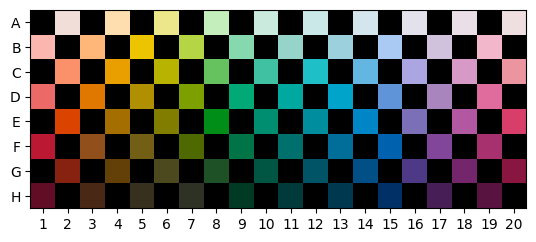

In [ ]:
def plot_colors(color_column):
    fig, ax = plt.subplots()
    for idx, row in df.iterrows():
        ax.add_patch(plt.Rectangle((row['x'] - 0.5, row['y'] - 0.5), 1, 1, color=row[color_column], linewidth=0))

    ax.set_xlim(0.5, 20.5)
    ax.set_ylim(0.5, 8.5)
    ax.set_aspect('equal')
    ax.set_facecolor('black')
    ax.set_xticks(range(1, 21))
    ax.set_yticks(range(1, 9), ['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'])

plot_colors('tile_hex')

We can also use this function to plot the most common name in each language for each color chip.

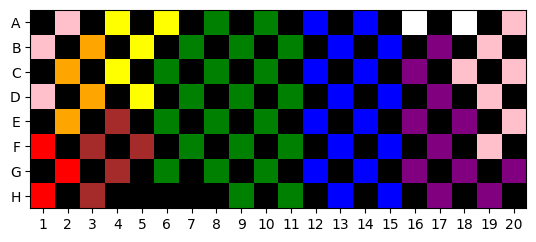

In [ ]:
# Also try 'spanish_color' and 'tsimane_color'
plot_colors('english_color')

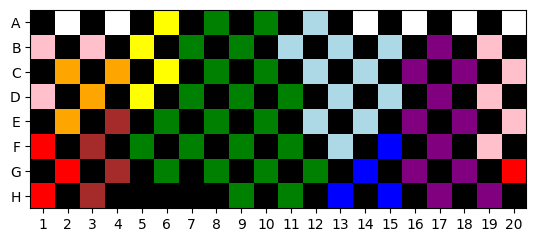

In [ ]:
plot_colors('spanish_color')

In [ ]:
plot_colors('tsima')

### Project Ideas:

- For each language, calculate what percentage of chips are named each color. Return dataframes for each language.

- Create a horizontal bar plot for each language. Each bar represents a color name and the length encodes the percentage of chips that are named that color.

- Is there a correlation between languages? Create scatter plots.
	- Hint: the x-axis could be the percentage of chips for English speakers and the y-axis could be the percentage of chips for Tsimane speakers and each data point represents a color name.

	- You might need to `merge` dataframes.


In [8]:
english_color_counts = df['english_color'].value_counts(normalize=True) * 100
spanish_color_counts = df['spanish_color'].value_counts(normalize=True) * 100
tsimane_color_counts = df['tsimane_color'].value_counts(normalize=True) * 100

english_color_df = english_color_counts.reset_index()
english_color_df.columns = ['color', 'percentage']

spanish_color_df = spanish_color_counts.reset_index()
spanish_color_df.columns = ['color', 'percentage']

tsimane_color_df = tsimane_color_counts.reset_index()
tsimane_color_df.columns = ['color', 'percentage']

print("English Color Percentages:")
display(english_color_df)

print("\nSpanish Color Percentages:")
display(spanish_color_df)

print("\nTsimane Color Percentages:")
display(tsimane_color_df)

English Color Percentages:


,color,percentage
0,green,27.50
1,blue,20.00
2,purple,13.75
3,pink,12.50
4,yellow,6.25
5,brown,6.25
6,orange,5.00
7,red,3.75
8,black,2.50
9,white,2.50



Spanish Color Percentages:


,color,percentage
0,green,27.50
1,lightblue,13.75
2,purple,13.75
3,pink,10.00
4,white,7.50
5,red,5.00
6,orange,5.00
7,yellow,5.00
8,brown,5.00
9,blue,5.00



Tsimane Color Percentages:


,color,percentage
0,green,25.00
1,blue,15.00
2,yellow,13.75
3,purple,12.50
4,white,11.25
5,red,10.00
6,brown,8.75
7,black,3.75


Create a horizontal bar plot for each language. Each bar represents a color name and the length encodes the percentage of chips that are named that color.

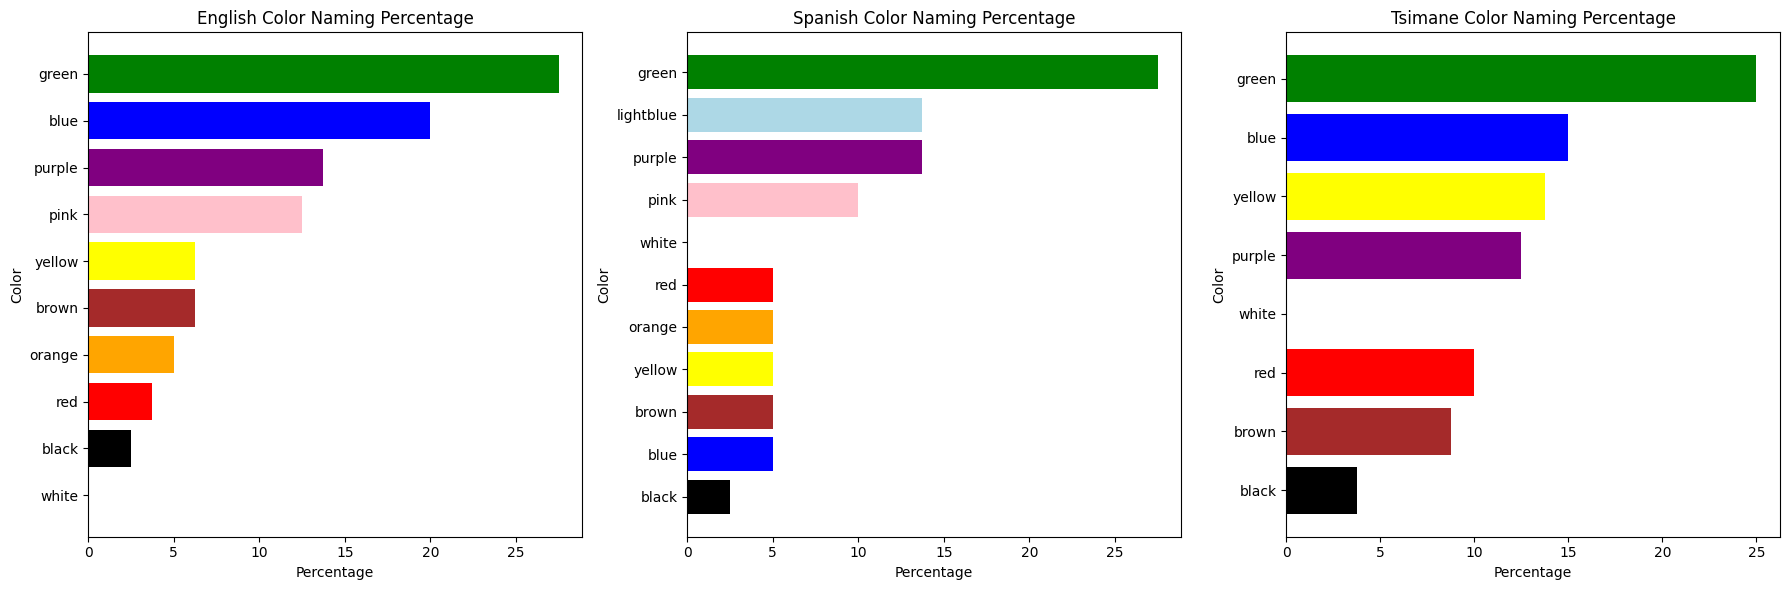

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# English plot
axes[0].barh(english_color_df['color'], english_color_df['percentage'], color=english_color_df['color'])
axes[0].set_title('English Color Naming Percentage')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Color')
axes[0].invert_yaxis() # To have the color with the highest percentage at the top

# Spanish plot
axes[1].barh(spanish_color_df['color'], spanish_color_df['percentage'], color=spanish_color_df['color'])
axes[1].set_title('Spanish Color Naming Percentage')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('Color')
axes[1].invert_yaxis()

# Tsimane plot
axes[2].barh(tsimane_color_df['color'], tsimane_color_df['percentage'], color=tsimane_color_df['color'])
axes[2].set_title('Tsimane Color Naming Percentage')
axes[2].set_xlabel('Percentage')
axes[2].set_ylabel('Color')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

Is there a correlation between languages? Create scatter plots.

Hint: the x-axis could be the percentage of chips for English speakers and the y-axis could be the percentage of chips for Tsimane speakers and each data point represents a color name.

You might need to merge dataframes

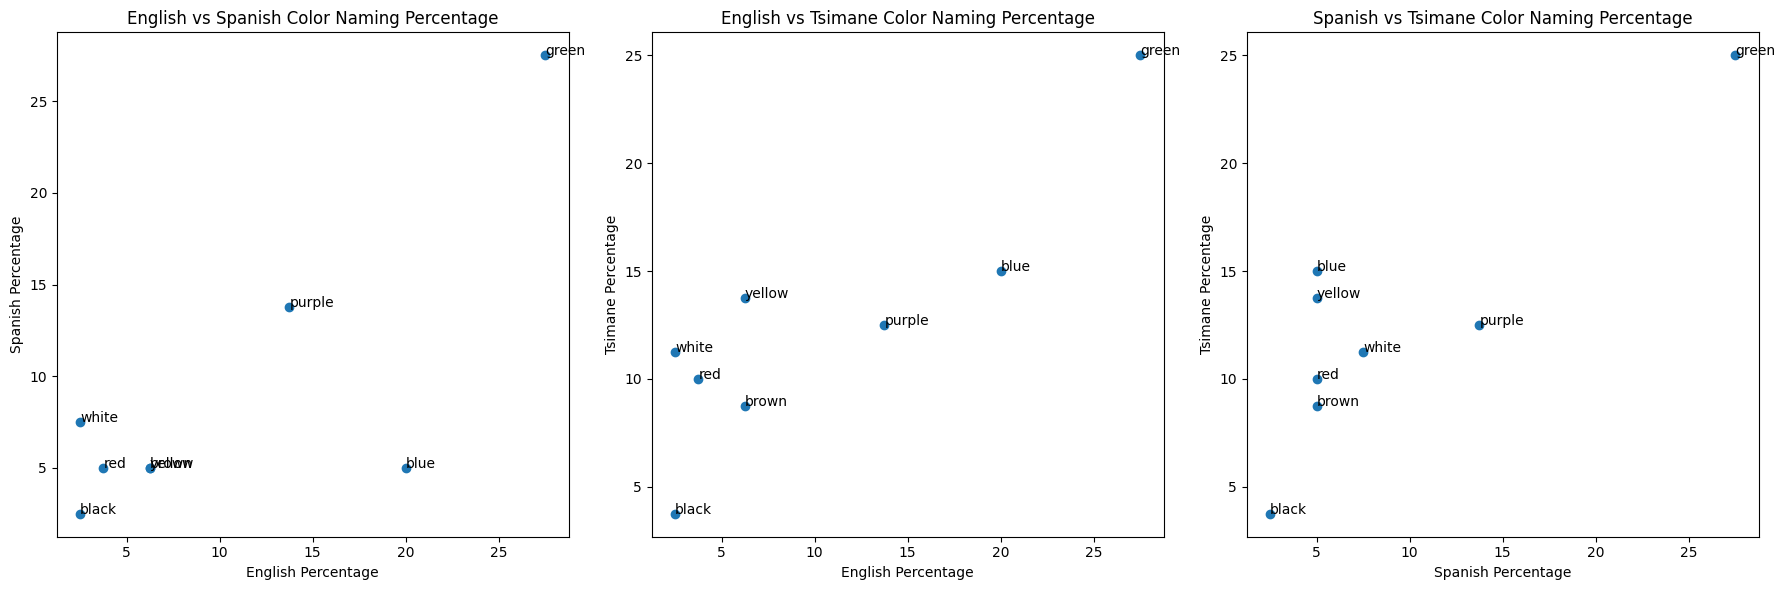

In [11]:
# Merge the dataframes on the 'color' column
merged_df = english_color_df.merge(spanish_color_df, on='color', suffixes=('_english', '_spanish'))
merged_df = merged_df.merge(tsimane_color_df.rename(columns={'percentage': 'percentage_tsimane'}), on='color')

# Create scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# English vs Spanish
axes[0].scatter(merged_df['percentage_english'], merged_df['percentage_spanish'])
axes[0].set_title('English vs Spanish Color Naming Percentage')
axes[0].set_xlabel('English Percentage')
axes[0].set_ylabel('Spanish Percentage')
for i, txt in enumerate(merged_df['color']):
    axes[0].annotate(txt, (merged_df['percentage_english'][i], merged_df['percentage_spanish'][i]))


# English vs Tsimane
axes[1].scatter(merged_df['percentage_english'], merged_df['percentage_tsimane'])
axes[1].set_title('English vs Tsimane Color Naming Percentage')
axes[1].set_xlabel('English Percentage')
axes[1].set_ylabel('Tsimane Percentage')
for i, txt in enumerate(merged_df['color']):
    axes[1].annotate(txt, (merged_df['percentage_english'][i], merged_df['percentage_tsimane'][i]))


# Spanish vs Tsimane
axes[2].scatter(merged_df['percentage_spanish'], merged_df['percentage_tsimane'])
axes[2].set_title('Spanish vs Tsimane Color Naming Percentage')
axes[2].set_xlabel('Spanish Percentage')
axes[2].set_ylabel('Tsimane Percentage')
for i, txt in enumerate(merged_df['color']):
    axes[2].annotate(txt, (merged_df['percentage_spanish'][i], merged_df['percentage_tsimane'][i]))


plt.tight_layout()
plt.show()